<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself. We will NOT grade this submissing w/o all the information<br>
<b>Name</b>: Aarif Razak<br> 
<b>NetID</b>: ahr58<br> 
<b>Recitation (01,02,90,91)</b>: 02<br> 
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:       AR


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Fall 2021

# Lab 3: Data Cleaning and Visualization

### Due Date: Sunday October 10, 2021 by 11:59 PM ###

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###. 

#### Important: Please do not add any new cells or change the order of cells. If you have questions, please contact the courseS staff.

In this lab, you will be working with a dataset from NYPD containing data on calls to the New York Police Department. Information about the datasets can be found https://opendata.cityofnewyork.us/

## Setup

Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [ ]:
!pip install datascience

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

# Part 1:Getting Data

We will work with the NYPD Historic complaint data set. Our first task is to estimate the size of this download by looking at the number of rows, columns and using an estimated size for a column (use a reasonable value). The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
### BEGIN SOLUTION
estimated size of the download (based on metadata information from the site) =  2 gigabytes     
# Since the covid data we used in recitation was around 120,000 rows, which is roughly .03 of a gigabyte, and this has 7.5 million rows, it was just simple math.
# for example, 120,000* 65 is around 7.5 million rows, thus .03 of a gig * 65 is around 2 gigabytes.
### END SOLUTION

SyntaxError: invalid syntax (<ipython-input-2-70d0b9097996>, line 2)

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [4]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
print(f'Located at {dest_path}')

Using version already downloaded: Thu Oct  7 11:31:08 2021
MD5 hash of file: ee839a250937dfe9e08e0338aa0e52c4
Located at data\NYPD_Complaint_Data_Historic.csv


### 1.2 Inspect the size of the file
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.

In [15]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
### BEGIN SOLUTION
import os
fileStats = os.stat('data\\NYPD_Complaint_Data_Historic.csv')
print(fileStats.st_size) #size of file in bytes
#### END SOLUTION

2352699423


### 1.3 Split the large file
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [2]:
import utils

In [19]:
# Using utils library, find the number of lines in the file
# import pysys
### BEGIN SOLUTION
from utils import *

linecount = line_count('data/NYPD_Complaint_Data_Historic.csv')
#print(line_num)

### END SOLUTION
linecount

7375994

In [20]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.

import pandas as pd
### BEGIN SOLUTION
i = 0
filename = 'data/NYPD_Complaint_Data_Historic.csv'
chunksize = int(np.ceil(float(linecount)/10)) #calcuating how many lines each group should contain if we have 10 groups

for chunk in pd.read_csv(filename, chunksize = chunksize):
    chunk.to_csv(f'data/NYPD_Complaint_Data_Historic_{i+1}.csv')
    print(utils.line_count(f'data/NYPD_Complaint_Data_Historic_{i+1}.csv'))
    i+=1


### END SOLUTION

737601
737601


C:\Users\coolk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


737601
737601
737601
737601
737601
737601
737601


C:\Users\coolk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


737594


### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [21]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['NYPD_Complaint_Data_Historic.csv',
 'NYPD_Complaint_Data_Historic_1.csv',
 'NYPD_Complaint_Data_Historic_10.csv',
 'NYPD_Complaint_Data_Historic_2.csv',
 'NYPD_Complaint_Data_Historic_3.csv',
 'NYPD_Complaint_Data_Historic_4.csv',
 'NYPD_Complaint_Data_Historic_5.csv',
 'NYPD_Complaint_Data_Historic_6.csv',
 'NYPD_Complaint_Data_Historic_7.csv',
 'NYPD_Complaint_Data_Historic_8.csv',
 'NYPD_Complaint_Data_Historic_9.csv']

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [22]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')

['CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX\n',
 '394506329,12/31/2019,17:30:00,,,32,12/31/2019,118,DANGEROUS WEAPONS,793,WEAPONS POSSESSION 3,COMPLETED,FELONY,MANHATTAN,,STREET,N.Y. POLICE DEPT,0,,,,999937,238365,,,,,40.82092679700002,-73.94332421899996,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,,UNKNOWN,UNKNOWN,E\n',
 '968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47,12/29/2019,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,,STREET,N.Y. POLICE DEPT,0,,,,1022508,261990,,,,,40.885701406000074,-73.86164032499995,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,,UNKNOWN,UNKNOWN,

### 1.6 Inspecting and describing data columns
There should be 35 columns in each record. Using header information and data types, describe the type of data in each
column. If you are unable to determine, just state so.
##### BEGIN SOLUTION
    * CMPLNT_NUM : Randomly generated ID for each complaint, Type: Number
    * CMPLNT_FR_DT: Exact date of occurance for reported event (or starting date of occurance, if CMPLNT_TO_DT exists), type: Floating Timestamp
    * CMPLNT_FR_TM: Exact time of occurance for the reported event (or starting time of occurance, if CMPLNT_TO_TM Exists), Type: Text
    * CMPLNT_TO_DT: Ending date of occurance for reported event, Type: Floating timestamp
    * CMPLNT_TO_TM: Ending time of currance for the reported event, if exact time of occurance is unknown, type: Text
    * ADD_PCT_CD: Precinct in which incident occured, type: Number
    * RPT_DT:  Date event was reported to police, Type: Floating Timestamp
    * KY_CD: Three digit offense classification code, Type: Number
    * OFNS_DESC: Description of offense corresponding with key code, type: Text
    * PD_ CD: Three digit internal classification code, Type: number
    * PD_DESC: Description of internal classification corresponding with PD Code, Type: Text
    * CRM_ATPT_CPTD_CD: Indicator of crime status, Type: text
    * LAW_CAT_CD: Level of offense, type: text
    * BORO_NM: Name of borough in which the icident occured, Type: text
    * LOC_OF_OCCUR_DESC: Specific location of occurrence, Type: Text
    * PREM_TYP_DESC: Specific description of premises, Type: Text
    * JURIS_DESC: Description of jurisdiction code, Type: Text
    * JURISDICTION_CODE: Responsible Jurisdiction, Type: Number
    * PARKS_NM: Name of NYC Park, playground, greenspace of occurance, Type: Text
    * HADDEVELOPT: Name of NYCHA Housing development of occurance, Type: Text 
    * HOUSING_PSA: Development Level Code, Type: Text
    * X_COORD_CD: X Coordinate for NYSPCS, Type: Number
    * Y_COORD_CD: Y coordinate for NYSPCS, Type: Number
    * SUSP_AGE_GROUP: Suspect's age group, Type: Text
    * SUSP_RACE: Suspect's race description, Type: Text
    * SUSP_SEX: Suspect's sex description, Type: Text
    * TRANSIT_DISTRICT: Transit district in which offense occured, Type: Text
    * Latitude: Midblock Latitude for GCS, Type: Number
    * Longitude: Midblock Longitude for GCS, Type: Number
    * Lat_Lon: Geospatial location point, Type: Location
    * PATROL_BORO: Name of patrol boroough in which the incident occured, Type: Text
    * STATION_NAME: Transit Station name, Type: Text
    * VIC_AGE_GROUP: Victim's age group, Type: Text
    * VIC_RACE: Victim's race description, Type: Text
    * VIC_SEX: Victim's sex description, Type: Text
##### END SOLUTION

# Part 2 - Exploratory Data Analysis
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Loading Data into a DataFrame
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [12]:
!pip install memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-py3-none-any.whl size=30183 sha256=90ab55dae2a67889e3f6c12d9fabf260f679e7c462644eca74a8edcac28ae337
  Stored in directory: c:\users\andyg\appdata\local\pip\cache\wheels\6a\37\3e\d9e8ebaf73956a3ebd2ee41869444dbd2a702d7142bcf93c42
Successfully built memory-profiler


In [1]:
### BEGIN SOLUTION
import pandas as pd
import time

start = time.process_time()

calls = pd.read_csv('data/NYPD_Complaint_Data_Historic_1.csv')

end = time.process_time()

print(end-start)


### END SOLUTION

4.4375


### 2.2 Description of Fields
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [2]:
### BEGIN SOLUTION



calls.info()
# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed 

#Answer: Since we have 737600 rows, anything with less than 368800 rows means that is missing more than 50% of the data,
# therefore, the following columns can be removed: PARKS_NM, HADEVELOPT, HOUSING_PSA, TRANSIT_DISTRICT, STATION_NAME 




### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737600 entries, 0 to 737599
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         737600 non-null  int64  
 1   CMPLNT_NUM         737600 non-null  int64  
 2   CMPLNT_FR_DT       737589 non-null  object 
 3   CMPLNT_FR_TM       737600 non-null  object 
 4   CMPLNT_TO_DT       622586 non-null  object 
 5   CMPLNT_TO_TM       622915 non-null  object 
 6   ADDR_PCT_CD        737256 non-null  float64
 7   RPT_DT             737600 non-null  object 
 8   KY_CD              737600 non-null  int64  
 9   OFNS_DESC          736945 non-null  object 
 10  PD_CD              736577 non-null  float64
 11  PD_DESC            736577 non-null  object 
 12  CRM_ATPT_CPTD_CD   737600 non-null  object 
 13  LAW_CAT_CD         737600 non-null  object 
 14  BORO_NM            736562 non-null  object 
 15  LOC_OF_OCCUR_DESC  596885 non-null  object 
 16  PR

### 2.2 Finding Uniques

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and answer the questions below.

In [3]:
### BEGIN SOLUTION

calls.nunique()


# Questions
# 1. How many distinct locations where the complaints have come from? - (Basing location on LAT_LON): 130595
# 2. How many age groups are represented in the data set? - 44
# 3. How many boroughs are included in the data set? - 5
# 4. How many offense types are listed in this data set? - 69

### END SOLUTION

Unnamed: 0           737600
CMPLNT_NUM           737491
CMPLNT_FR_DT           4811
CMPLNT_FR_TM           1440
CMPLNT_TO_DT           3619
CMPLNT_TO_TM           1440
ADDR_PCT_CD              77
RPT_DT                 3909
KY_CD                    69
OFNS_DESC                65
PD_CD                   387
PD_DESC                 379
CRM_ATPT_CPTD_CD          2
LAW_CAT_CD                3
BORO_NM                   5
LOC_OF_OCCUR_DESC         5
PREM_TYP_DESC            74
JURIS_DESC               21
JURISDICTION_CODE        21
PARKS_NM                738
HADEVELOPT              262
HOUSING_PSA             395
X_COORD_CD            54536
Y_COORD_CD            57546
SUSP_AGE_GROUP           25
SUSP_RACE                 7
SUSP_SEX                  3
TRANSIT_DISTRICT         12
Latitude             130582
Longitude            128042
Lat_Lon              130595
PATROL_BORO               8
STATION_NAME            368
VIC_AGE_GROUP            44
VIC_RACE                  7
VIC_SEX             

### 2.3 Offense by Boro
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame calls_by_Boro_and_offense

In [42]:
### BEGIN SOLUTION
calls_by_Boro_and_offense = calls.groupby("BORO_NM")


calls_by_Boro_and_offense.groups

### END SOLUTION

{'BRONX': Int64Index([     1,      3,      8,     14,     15,     17,     19,     20,
                 26,     30,
             ...
             737555, 737562, 737566, 737569, 737585, 737586, 737587, 737595,
             737597, 737599],
            dtype='int64', length=160809),
 'BROOKLYN': Int64Index([     6,     16,     31,     36,     44,     52,     55,     79,
                 88,    107,
             ...
             737568, 737571, 737573, 737575, 737576, 737578, 737579, 737583,
             737588, 737598],
            dtype='int64', length=215135),
 'MANHATTAN': Int64Index([     0,      5,      9,     10,     11,     18,     23,     25,
                 27,     28,
             ...
             737565, 737570, 737572, 737574, 737580, 737581, 737582, 737589,
             737590, 737592],
            dtype='int64', length=181913),
 'QUEENS': Int64Index([     2,      7,     12,     21,     33,     38,     39,     42,
                 53,     59,
             ...
             7

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [27]:
### BEGIN SOLUTION

print(calls_by_Boro_and_offense.get_group('BRONX').OFNS_DESC.values)

### END SOLUTION

# How many offenses were committed in Bronx during the analysis period? 
print(len(calls_by_Boro_and_offense.get_group('BRONX')))

['FORGERY' 'MISCELLANEOUS PENAL LAW' 'OFF. AGNST PUB ORD SENSBLTY &' ...
 'ROBBERY' 'ASSAULT 3 & RELATED OFFENSES' 'GRAND LARCENY']
160809


### 2.5 Most Common Crimes in NYC

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [12]:
### BEGIN SOLUTION

bronxAllCrimes = calls_by_Boro_and_offense.get_group('BRONX').OFNS_DESC.value_counts()


bronxAllCrimes.nlargest()

### END SOLUTION

HARRASSMENT 2                     24509
PETIT LARCENY                     24021
ASSAULT 3 & RELATED OFFENSES      21738
CRIMINAL MISCHIEF & RELATED OF    17065
DANGEROUS DRUGS                   10197
Name: OFNS_DESC, dtype: int64

### 2.6 Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx?

In [24]:
### BEGIN SOLUTION

#helper 

bronx = calls_by_Boro_and_offense.get_group('BRONX')

#display(bronx)

#all possible crimes in bronx

bronxAllCrimesNum = len(bronx.OFNS_DESC)

#print(bronxAllCrimesNum)

#all crimes of arson in the bronx

bronxArson = bronx.loc[bronx['OFNS_DESC'] == 'ARSON'].shape[0] #.shape[0] returns number of rows


print(bronxArson/bronxAllCrimesNum)

### END SOLUTION

0.0026491054605152697


---
# Part 3: Visualizing the Data

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

### 3.1 Plotting a Series
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

Text(0, 0.5, 'Crime Category')

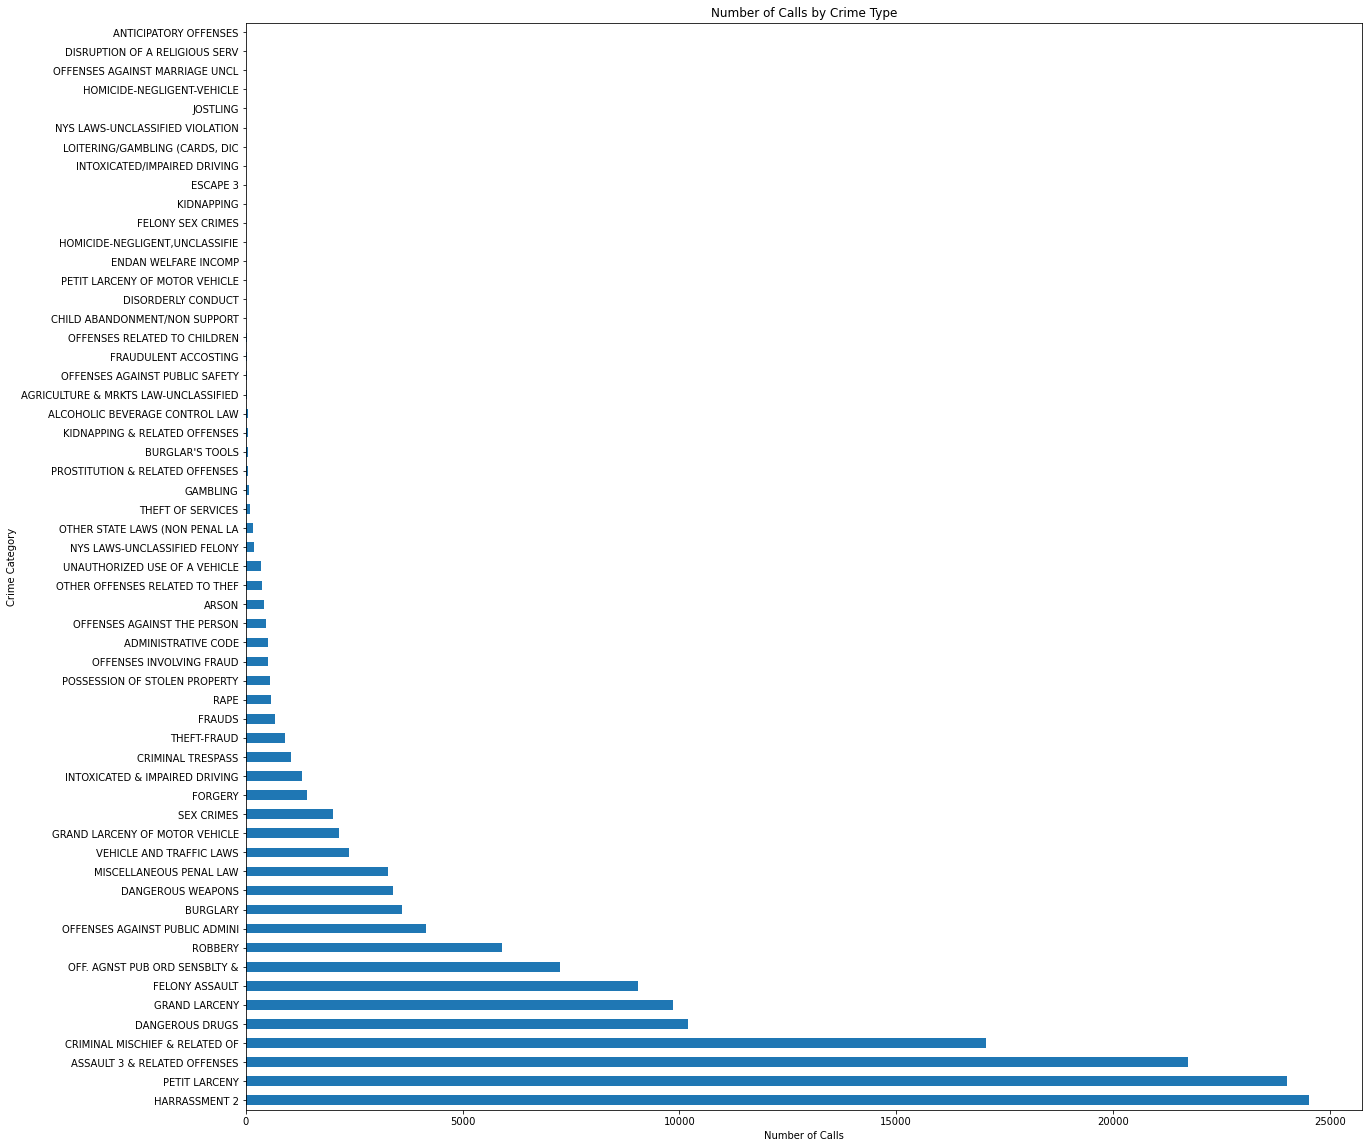

In [30]:
### BEGIN SOLUTION

import pandas as pd


df = pd.DataFrame(data = bronxAllCrimes)


ax = df.plot.barh(figsize=(20,20), legend = False)
ax.set_title("Number of Calls by Crime Type")
ax.set_xlabel("Number of Calls")
ax.set_ylabel("Crime Category")


### END SOLUTION

### 3.2 Getting a Better Plot
The plot above can be messy as it plots all offenses. Plot only the offenses that has more than 10000 calls

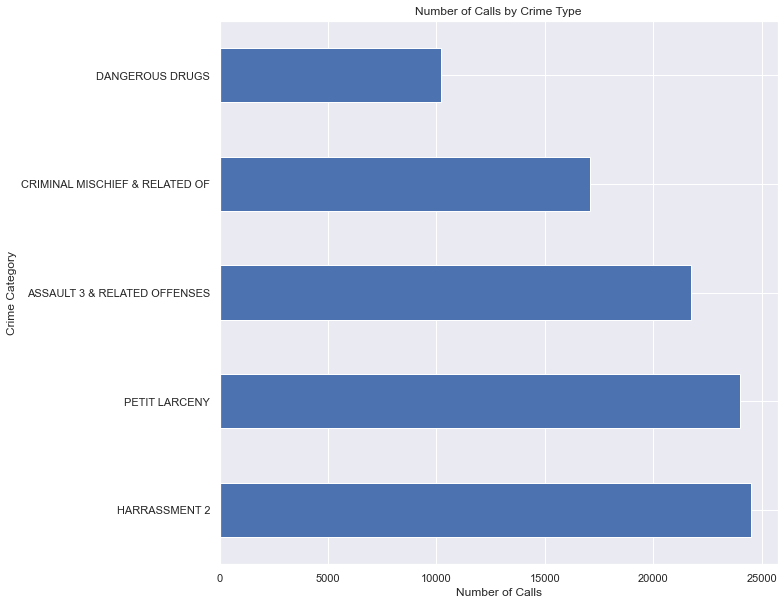

In [125]:
### BEGIN SOLUTION

#nlargest will return the 5 rows that have over 10,000 calls (as seen from 2.5)

#modify the original DF


#calls_by_Boro_and_offense.get_group('BRONX').OFNS_DESC.value_counts()

df1 = pd.DataFrame(data = bronxAllCrimes.nlargest()) 

ax = df1.plot.barh(figsize=(10,10), legend = False)
ax.set_title("Number of Calls by Crime Type")
ax.set_xlabel("Number of Calls")
ax.set_ylabel("Crime Category")

end; 
### END SOLUTION

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

Text(0, 0.5, 'Crime Category')

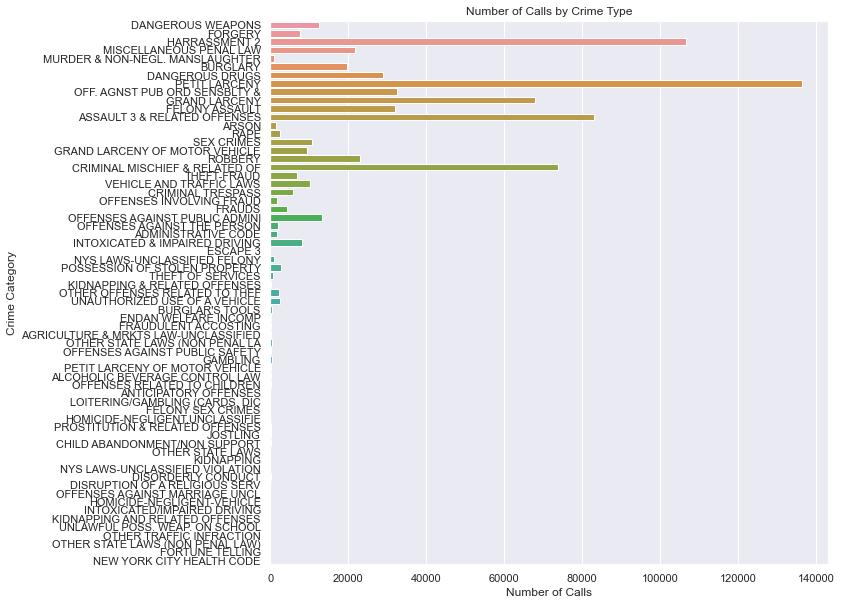

In [63]:
### BEGIN SOLUTION

import seaborn as sns

callsOffenses = calls.OFNS_DESC

data = pd.DataFrame(data = callsOffenses)

sns.set(rc = {'figure.figsize':(10,10)})

ax = sns.countplot(data= data, y = 'OFNS_DESC')

ax.set_title("Number of Calls by Crime Type")
ax.set_xlabel("Number of Calls")
ax.set_ylabel("Crime Category")


### END SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

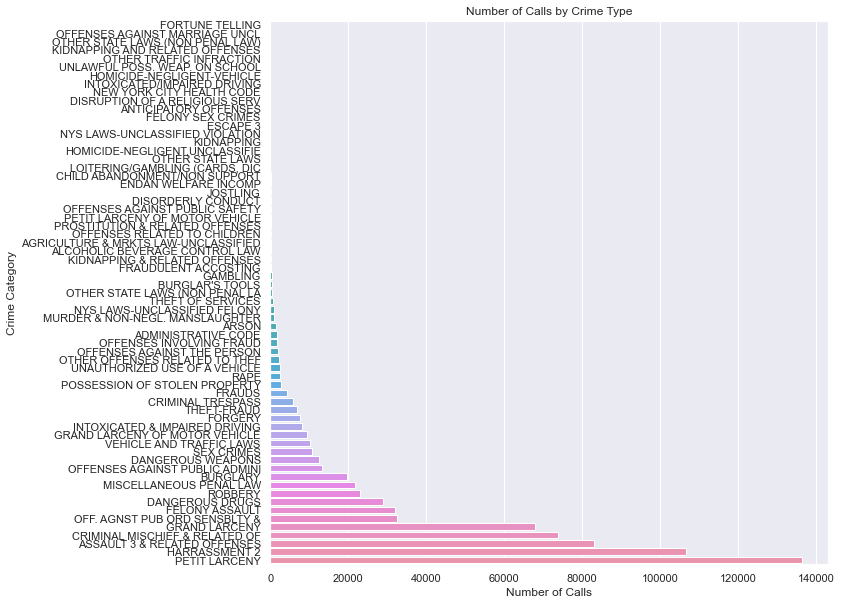

In [72]:
### BEGIN SOLUTION

callsOffenses = calls.OFNS_DESC

data = pd.DataFrame(data = callsOffenses)

sns.set(rc = {'figure.figsize':(10,10)})

ax = sns.countplot(data= data, y = 'OFNS_DESC', order = calls['OFNS_DESC'].value_counts(ascending = True).index)

ax.set_title("Number of Calls by Crime Type")
ax.set_xlabel("Number of Calls")
ax.set_ylabel("Crime Category")
end; 

### END SOLUTION

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

### 3.3 making more plots

Now it is your turn to make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

In [97]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
### BEGIN SOLUTION

import datetime as dt
from datetime import date
import calendar

s = calls['CMPLNT_FR_DT'] #grab as a series

converted= pd.to_datetime(s, errors = 'coerce') #using 'errors = coerce' avoids null values being annoying


#we need to add a new column (series) to the dataframe calls
calls["DAY_OF_WEEK"] = converted.dt.day_name()

end;


### END SOLUTION

### 3.4 Seaborn plots

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

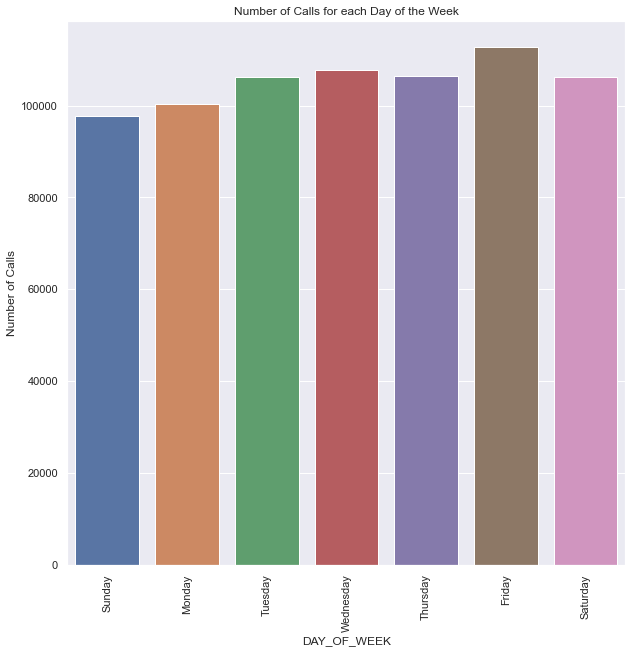

In [118]:
### BEGIN SOLUTION

import seaborn as sns

groupedByDOW = calls.DAY_OF_WEEK

#groupedByDOW

data2 = pd.DataFrame(data = groupedByDOW)

#display(groupedByDOW)

sns.set(rc = {'figure.figsize':(10,10)})

ax = sns.countplot(data= data2, x = "DAY_OF_WEEK", order = days)
ax.set_title("Number of Calls for each Day of the Week")
ax.set_ylabel("Number of Calls")
ax.set_xlabel("DAY_OF_WEEK")
ax.set_xticklabels(labels = days, rotation = 90)

end;


### END SOLUTION

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

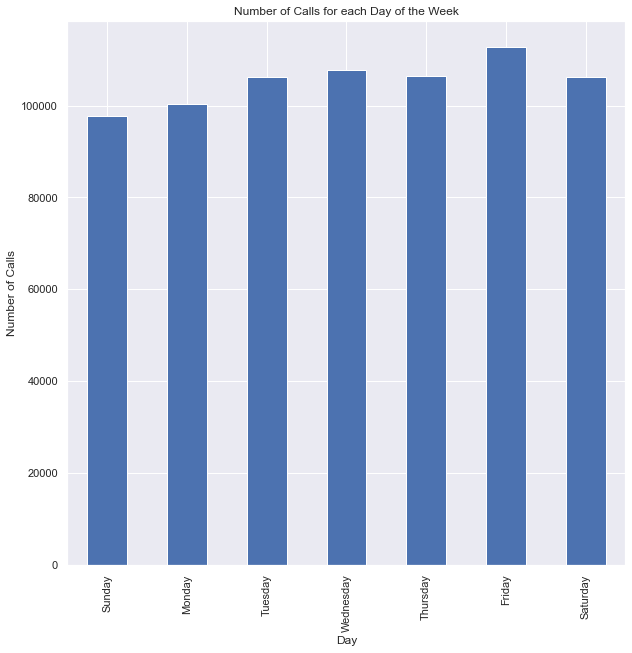

In [127]:
### BEGIN SOLUTION
import pandas as pd

allCrimesDOW = calls.DAY_OF_WEEK.value_counts()
#using the hint here
ordered = allCrimesDOW[days]


df3 = pd.DataFrame(data = ordered) 
#sort_columns = True
ax = df3.plot.bar(figsize=(10,10), legend = False)
ax.set_title("Number of Calls for each Day of the Week")
ax.set_ylabel("Number of Calls")
ax.set_xlabel("Day")
ax.set_xticklabels(labels = days, rotation = 90) #mimicing prev problems

end;


### END SOLUTION

## 3.5 What Day of the Week is more calls?

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

##### BEGIN SOLUTION

##### END SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

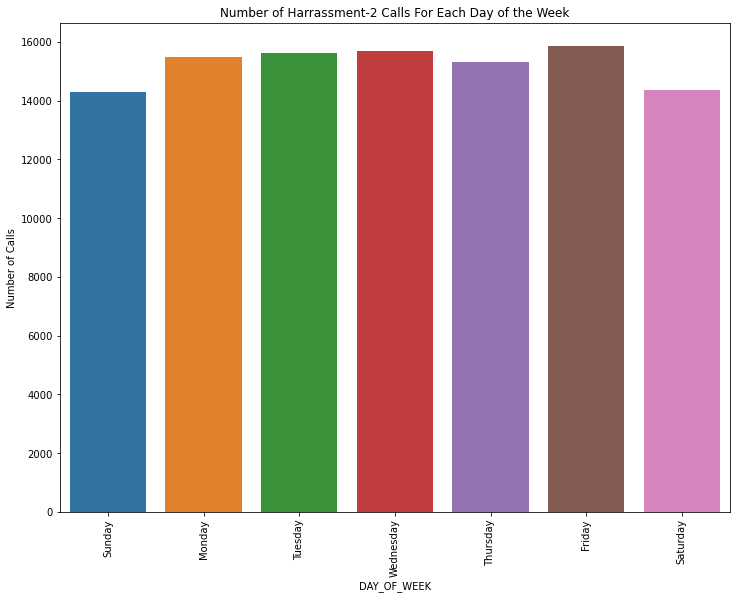

In [28]:
### BEGIN SOLUTION


### END SOLUTION

### 3.6 

Do you see anything interesting about the distribution of HARRASSMENT 2 calls over a week? Type a short answer below.
##### BEGIN SOLUTION


##### END SOLUTION

### 3.7 More Plots

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

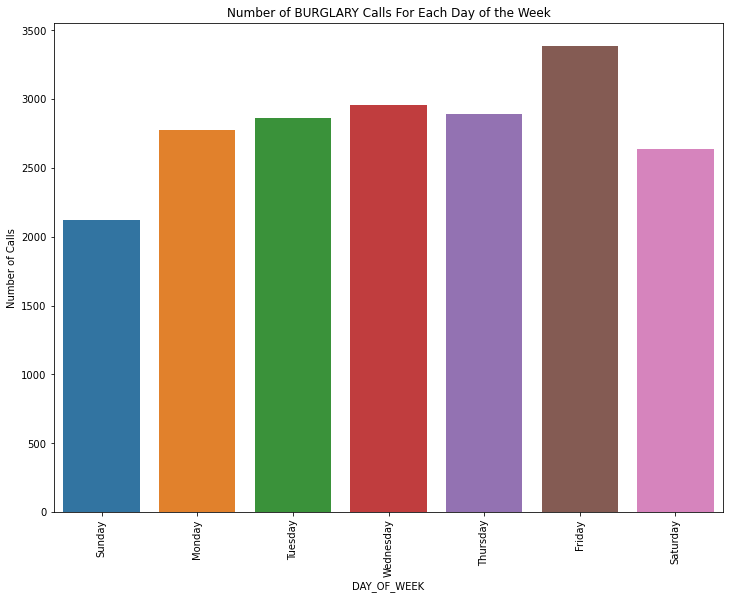

In [29]:
### BEGIN SOLUTION


### END SOLUTION



### 3.8 time of events

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

In [30]:
calls["Hour"] = calls["CMPLNT_TO_TM"].str.slice(0,2).replace(np.NaN,0).astype('int')

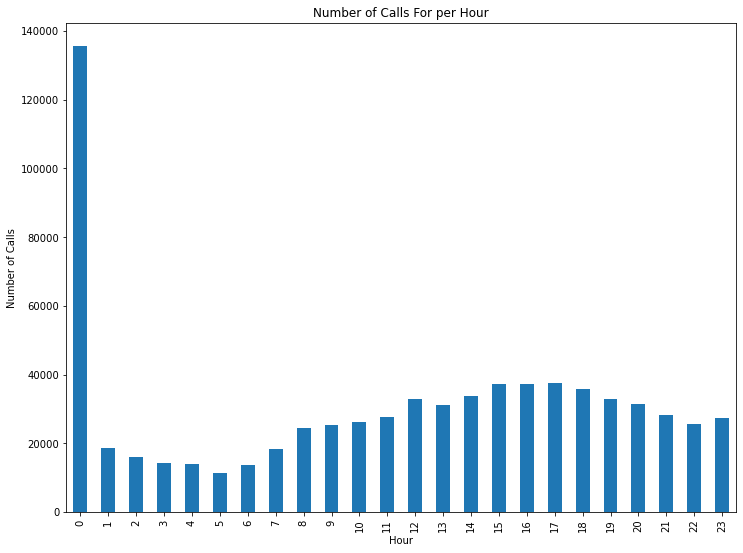

In [31]:
### BEGIN SOLUTION

### END SOLUTION

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

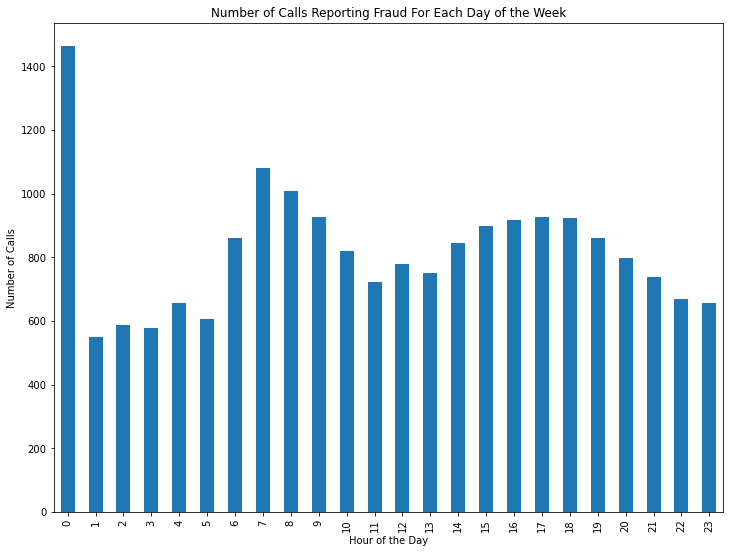

In [32]:
### BEGIN SOLUTION


### END SOLUTION

### 3.9 More plots

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

C:\Users\andyg\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


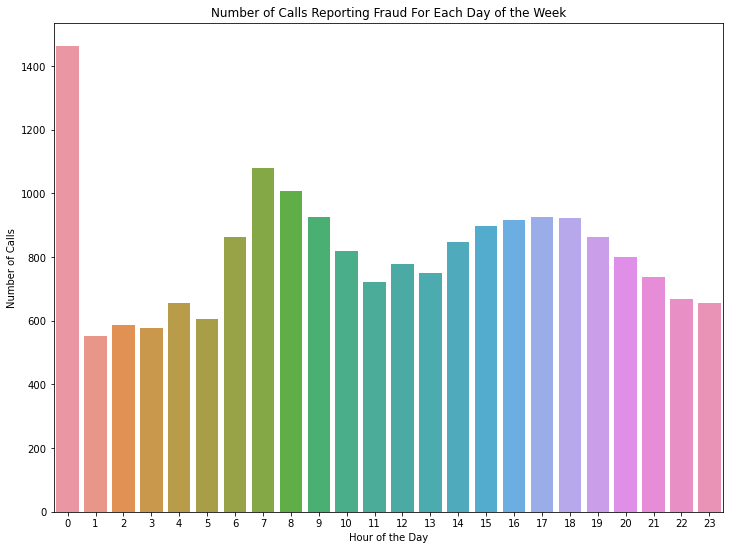

In [33]:
### BEGIN SOLUTION

### END SOLUTION

### 3.8 Spike in burglary?

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

#### BEGIN SOLUTION


#### END SOLUTION

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

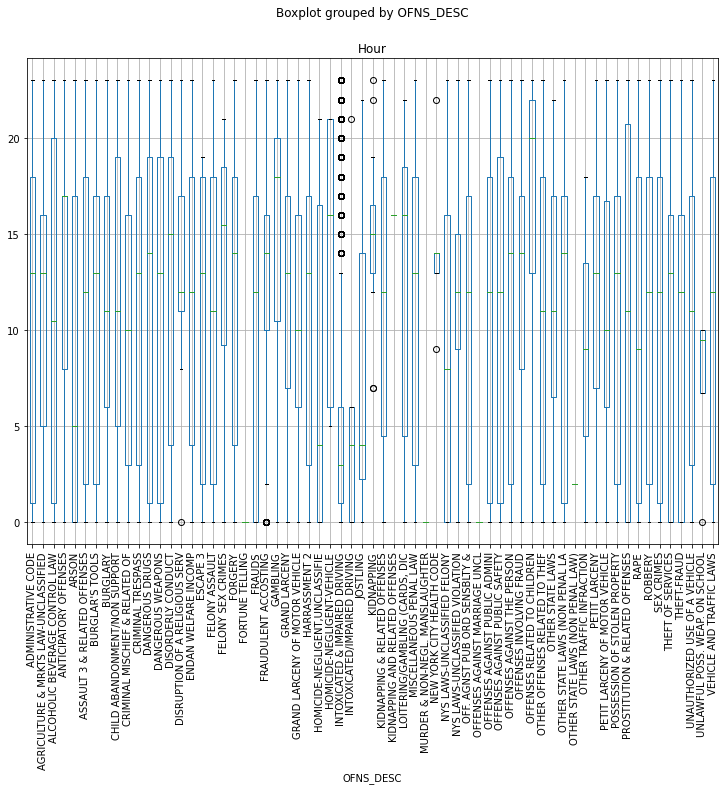

In [34]:
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

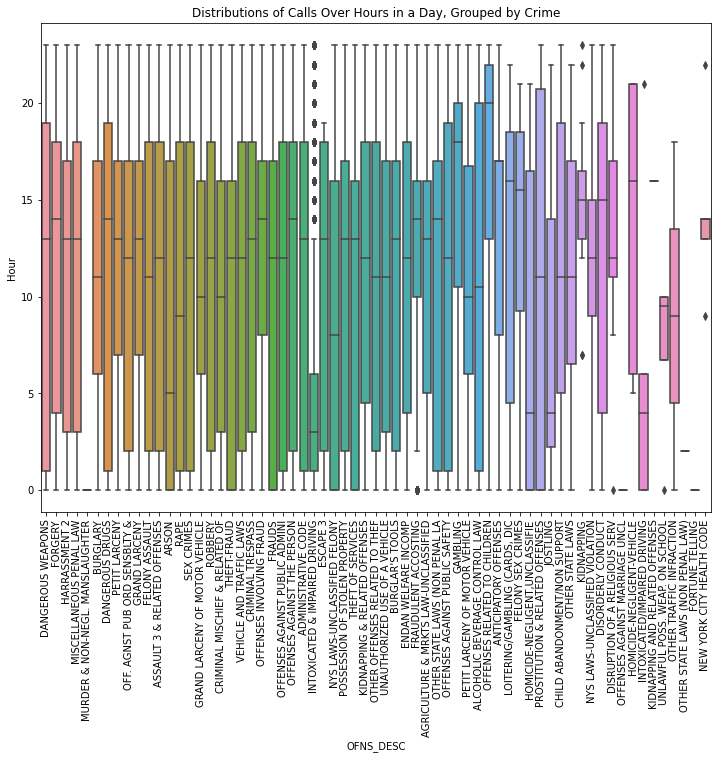

In [36]:
# Todo: Make a boxplot with seaborn
### BEGIN SOLUTION


### END SOLUTION

### 3.9 - Visualization of crimes on a Map of NYC
finally we attempt to visualize the crimes committed in NYC on a Map. First we need to installing some mapping software. run the cell below to install folium package for mapping software.

In [37]:
!pip install --upgrade folium

In [38]:
buNYC = calls[calls["OFNS_DESC"] == "BURGLARY"][:20]
len(buNYC)

20

In [39]:
### Plot the maps for BURGLARY in NYC
### if it takes too much time or map does not show up, try plotting a subset of the data set of for a specific crime
import folium
### BEGIN SOLUTION

### END SOLUTION

In [40]:
map1

 ## Congratulations !!!

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> Output:</b> Please **remove all output** from your notebook prior to submission<br>
<b> Data:</b> **DO NOT** submit any data files. You may lose points if you do so<br>
<b> File Name:</b> Please name the file as your_section_your_netID_Lab3.ipynb (eg. 01_adg133_Lab3.ipynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; Lab3 <br>
<b>Warning:</b> Failure to follow directions may result in loss of points.<br>
</div>

@2021 A.D. Gunawardena. Many people contributed to this lab including CS439 TA Liqin Long (currently @ Google). Much credit go to my friend and Princeton colleague Prof. Josh Hug (@ Berkeley), and Berkeley Data Science Group for their contributions to the original version. Please DO NOT share this lab and/or post them on public sites.